# Objective: Building a model to predict the severity of an accident

The data used for this exercise Openly available UK traffic accidents data on <a hfref='https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales'>Kaggle</a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix


In [4]:
data = pd.concat([pd.read_csv("data_files/accidents_2005_to_2007.csv"), 
                  pd.read_csv("data_files/accidents_2009_to_2011.csv"), 
                  pd.read_csv("data_files/accidents_2012_to_2014.csv")])

In [5]:
print(data.shape)
data.head()

(1504150, 33)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [6]:
data.isna().sum()
# We see there are NULL values in some of our columns. Will take care of it in later part.

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [7]:
# As Severity is mainly judged on the basis of casualities involved in it. 
# So, lets analyze the distribution of casualities with other variables. 
year_casualties = data.groupby(['Year'])['Number_of_Casualties'].sum().reset_index().sort_values(by='Number_of_Casualties', ascending=False)
year_casualties

,Year,Number_of_Casualties
0,2005,271017
1,2006,258404
2,2007,247780
6,2012,241954
3,2009,222146
4,2010,208648
5,2011,203950
8,2014,194477
7,2013,183670


**Its evident with this table that there has been a  decline in the casualties number year by year. <br>
Thanks to the advancements in Science and Technology.** 

In [8]:
week_days_casualties = data.groupby(['Day_of_Week']).agg({'Number_of_Casualties':['sum']}).sort_values([('Number_of_Casualties','sum')],ascending=False)
week_days_casualties

,Number_of_Casualties
,sum
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


**The number of casualties towards the weekend are more than we see early during the week**

In [9]:
##Checking coorelation of other variables with the target variable
data.corr()["Accident_Severity"].sort_values(ascending=False).reset_index()

,index,Accident_Severity
0,Accident_Severity,1.000000
1,Number_of_Vehicles,0.075976
2,2nd_Road_Class,0.064321
3,2nd_Road_Number,0.026128
4,Longitude,0.013946
5,Location_Easting_OSGR,0.013465
6,1st_Road_Class,0.012754
7,Day_of_Week,0.002961
8,1st_Road_Number,-0.004072
9,Year,-0.005907


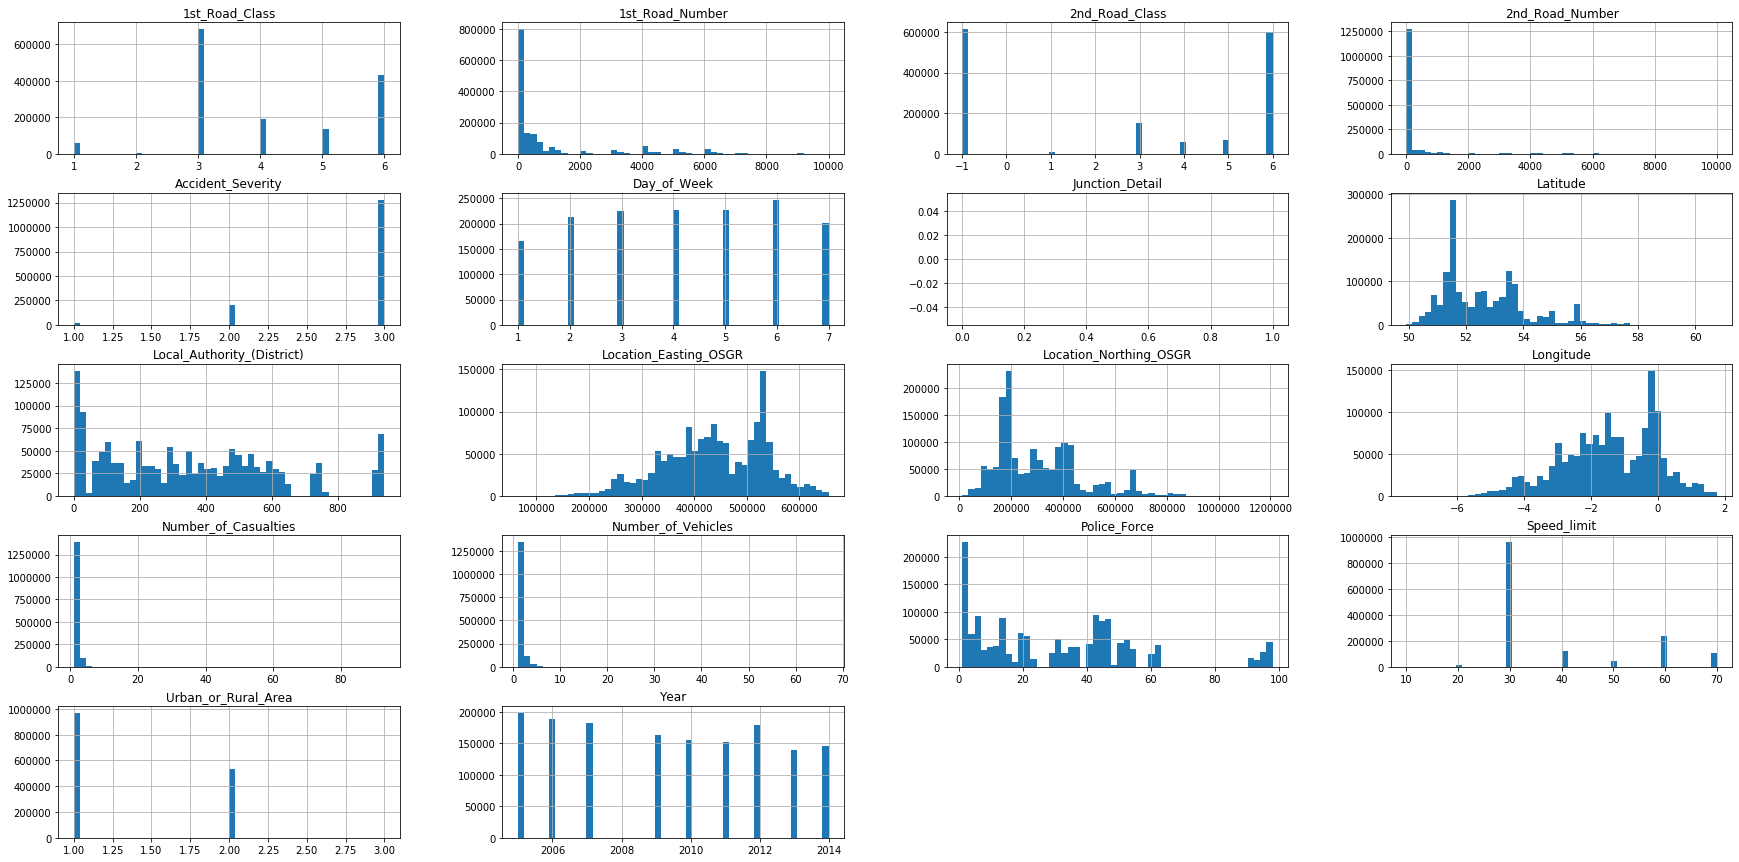

In [10]:
## Checking the distribution of all columns, would help distinguish between categorical and 
## continous variables and their respective distributions as well
data.hist(bins=50, figsize=(30,15))
plt.show()

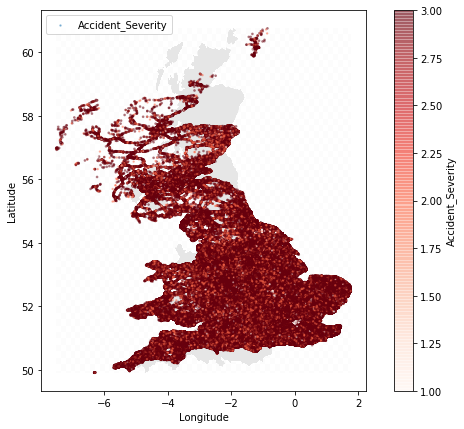

In [12]:
from PIL import Image
plt.figure(figsize=(10,7))
img=Image.open('uk_map.png')

plt.imshow(img,alpha=0.1,zorder=0,extent=[data['Longitude'].min(),data['Longitude'].max(),data['Latitude'].min(),data['Latitude'].max()])
ax = plt.gca()
data.plot(x='Longitude', y='Latitude', kind='scatter', alpha=0.4, 
         s=data['Accident_Severity'], label='Accident_Severity', ax=ax,
         c= 'Accident_Severity', cmap=plt.get_cmap('Reds'), colorbar=True, zorder=5)
plt.legend()
plt.show()

In [13]:
# Based on the type and kind of data we have for some variable, 
# dropping the unnedcessary ones. 
data.drop(['Police_Force', 'Junction_Detail', 'Junction_Control', 'Special_Conditions_at_Site', 
           'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location', 
           'Local_Authority_(District)', 'Local_Authority_(Highway)',
          'Accident_Index','Date','Year','Location_Easting_OSGR','Location_Northing_OSGR'], axis=1, inplace=True)

In [14]:
data.dropna(inplace=True)

In [15]:
data.Weather_Conditions.value_counts()

Fine without high winds       1203397
Raining without high winds     177620
Other                           33434
Unknown                         26772
Raining with high winds         20809
Fine with high winds            18346
Snowing without high winds      11299
Fog or mist                      8183
Snowing with high winds          1959
Name: Weather_Conditions, dtype: int64

In [16]:
data.Road_Type.value_counts()

Single carriageway    1125190
Dual carriageway       221527
Roundabout             100224
One way street          30913
Slip road               15651
Unknown                  8314
Name: Road_Type, dtype: int64

In [17]:
# Leaving unknown data
data = data[data.Weather_Conditions!='Unknown']
data = data[data.Road_Type!='Unknown']

In [18]:
# Encoding Object type Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Pedestrian_Crossing-Physical_Facilities"]= le.fit_transform(data["Pedestrian_Crossing-Physical_Facilities"])
data["Light_Conditions"]= le.fit_transform(data["Light_Conditions"])
data["Weather_Conditions"] = le.fit_transform(data["Weather_Conditions"])
data["Road_Surface_Conditions"] = le.fit_transform(data["Road_Surface_Conditions"])
data["Pedestrian_Crossing-Human_Control"] = le.fit_transform(data["Pedestrian_Crossing-Human_Control"])
data["Road_Type"] = le.fit_transform(data["Road_Type"])

In [19]:
# Converting Time to type Number
data["Time"]= data["Time"].astype(str)
data['Time']=data['Time'].str.slice(0,2, 1)
data["Time"]= data["Time"].astype(int)

In [20]:
data_processed = data.copy()

In [21]:
X = data_processed.drop(columns=['Accident_Severity'])
y = data_processed[['Accident_Severity']]

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [24]:
xgb_c = XGBClassifier(max_depth=4, learning_rate=0.2, n_estimators=600, silent=True,
                        subsample = 0.8,
                        gamma=0.5,
                        min_child_weight=10,
                        objective='multi:softprob',
                        colsample_bytree = 0.6,
                        max_delta_step = 1,
                        nthreads=1,
                        n_jobs=1,
                     class_weight="balanced")

In [25]:
xgb_c.fit(X_train,y_train)

XGBClassifier(class_weight='balanced', colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.2, max_delta_step=1, max_depth=4,
              min_child_weight=10, n_estimators=600, nthreads=1,
              objective='multi:softprob', silent=True, subsample=0.8)

In [26]:
from sklearn.metrics import accuracy_score
y_pred = xgb_c.predict(X_test) 
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions) 

In [27]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.00%


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[    14,    153,   5553],
       [    14,    391,  59942],
       [     6,    377, 373948]], dtype=int64)

**Even though the overall accuracy seemed good, but the confusion matrix shows us that the result is biased towards '3' category of Severity as we had quite more samples within that**

In [29]:
y.Accident_Severity.value_counts()

3    1247909
2     200942
1      19141
Name: Accident_Severity, dtype: int64

**Adopting Over-Sampling techinique to deal with the imbalanced data, as the original size of dataset is quite huge**

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
rus = RandomOverSampler(random_state=0)
rus.fit(X,y)

RandomOverSampler(random_state=0)

In [33]:
X_resampled, y_resampled = rus.fit_sample(X,y)

In [34]:
X_resampled = pd.DataFrame(columns=X.columns,data=X_resampled)

In [35]:
y_resampled = pd.DataFrame(columns=y.columns,data=y_resampled)

In [36]:
X_resampled.shape

(3743727, 18)

In [37]:
y_resampled.shape

(3743727, 1)

In [38]:
y_resampled.Accident_Severity.value_counts()

3    1247909
2    1247909
1    1247909
Name: Accident_Severity, dtype: int64

**Resampled, got a balanced set now. <br>
Can try modelling again**

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3, random_state=1)

classifier = XGBClassifier()

In [40]:
from sklearn.model_selection import cross_val_score
# all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [39]:
# print(all_accuracies.mean())

In [40]:
grid_param = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'objective' : ['multi:softprob']
        }

In [41]:
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=4)

In [42]:
# gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_wei

In [43]:
# best_parameters = gd_sr.best_params_
# print(best_parameters)
# {'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 5, 'objective': 'multi:softprob', 'subsample': 0.6}

{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 5, 'objective': 'multi:softprob', 'subsample': 0.6}


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
new_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

In [45]:
new_classifier.fit(X_train_sc,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [46]:
from sklearn.metrics import accuracy_score
y_pred = new_classifier.predict(X_test_sc) 
accuracy = accuracy_score(y_test, y_pred) 

In [47]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.32%


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[271261,   9540,  93177],
       [    92, 329219,  45451],
       [   570,  38475, 335334]], dtype=int64)

In [54]:
feats = {}
for feature, importance in zip(X_train_sc.columns, new_classifier.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

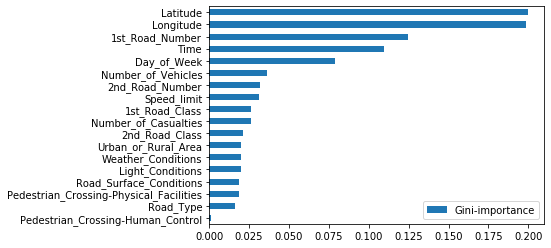

In [56]:
importances.sort_values(by='Gini-importance').plot(kind='barh')